In [1]:
from utils import SurrogatPyRepEnvironment
from basic_walk.utils import BaseAgent
import sys
import time


import pickle
import matplotlib.pyplot as plt
import numpy as np

from tqc import structures, DEVICE
from tqc.trainer import Trainer
from tqc.structures import Actor, Critic, RescaleAction
from tqc.functions import eval_policy
from tqdm import tqdm, trange
import copy

from IPython.display import clear_output

## Анализ обучения

In [2]:
def extract_param(info_log, param_name):
    param = []
    for info in info_log:
        param.append(info[param_name])
    
    return param

In [3]:
t = 500000 - 1
file_name = f"learning_info/info_{t+1}.pickle"
with open(file_name, 'rb') as f:
    info = pickle.load(f)

0.3013245729488189


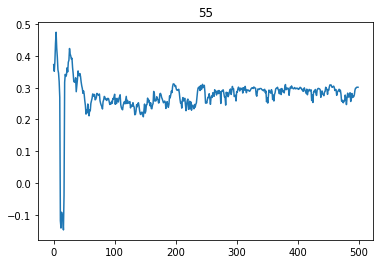

0.31627121725068497


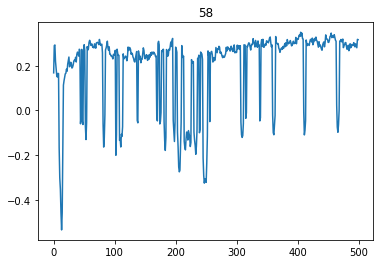

0.30436964238488606


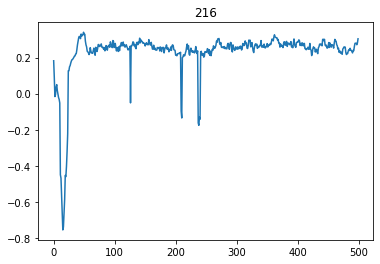

0.3070949553659613


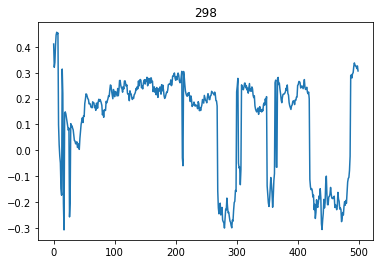

0.31081944301808934


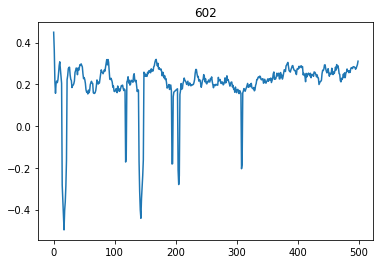

0.306908482780897


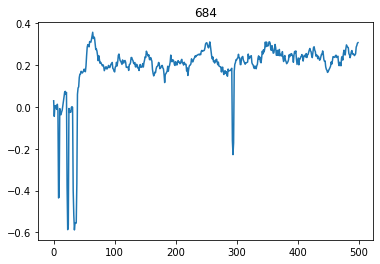

0.31622678870333154


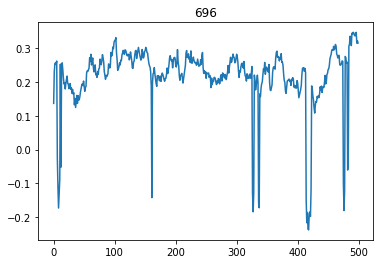

0.3454571894961813


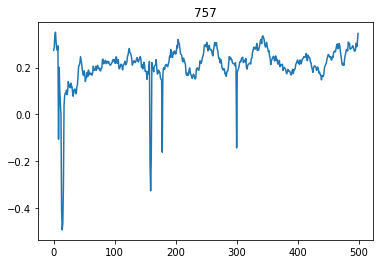

0.3149033703862478


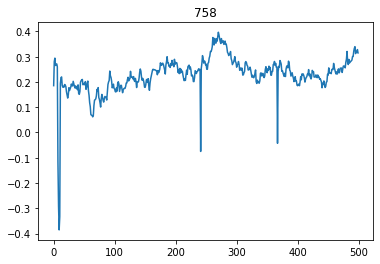

In [4]:
for i, cur_info in enumerate(info):
    if len(cur_info) < 500 or cur_info[-1]["reward"] < 0.3:
        continue
    print(cur_info[-1]["reward"])
    reward = extract_param(cur_info, "reward")
    plt.title(i)
    plt.plot(reward)
    plt.show()

In [5]:
info[0][0].keys()

dict_keys(['fall_metric', 'y', 'x', 'fall_reward', 'fall_prob', 'velocity_reward', 'smooth_reward', 'reward', 'done', 'action', 'state'])

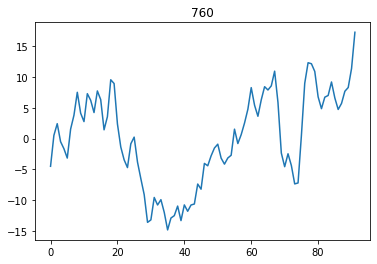

In [6]:
param = extract_param(info[2], "x")
plt.title(i)
plt.plot(param)
plt.show()

In [7]:
# assert False

# Display Replay

In [8]:
actions = extract_param(info[758], "action")
new_info = []
with SurrogatPyRepEnvironment('scenes/basic_scene.ttt', headless_mode=True, foot_only_mode=True) as env:
#     for _ in range(20):
#         env.reset()
#         time.sleep(4 / 20)
    env.reset()
    for action in actions:
        _, _, _, curr_info = env.step(action)
        new_info.append(curr_info)
#         time.sleep()

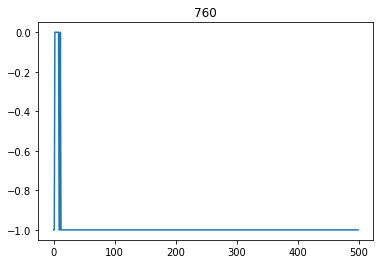

In [10]:
param = extract_param(new_info, "collision_reward")
# param = extract_param(info[758], "reward")

plt.title(i)
plt.plot(param)
plt.show()

In [11]:
param

[-1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1